In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data Flight

In [ ]:
df = pd.read_csv('flight.csv')
df.sample(5)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  \
50960      33472   9/22/2012        12/24/2012    Male         4   
14295      41972  10/12/2011         4/27/2012    Male         4   
57602      15330   11/7/2012        11/21/2012    Male         4   
46151       8148    9/7/2012         9/18/2012  Female         4   
26190      33064   11/8/2011         9/13/2012    Male         4   

           WORK_CITY WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  \
50960      zhongqing     zhongqing           CN  39.0  3/31/2014  ...   
14295      guangzhou     guangdong           CN  34.0  3/31/2014  ...   
57602  CALOOCAN CITY           NaN           PH  73.0  3/31/2014  ...   
46151        haerbin  heilongjiang           CN  33.0  3/31/2014  ...   
26190       shenzhen     guangdong           CN  46.0  3/31/2014  ...   

       SUM_YR_2  SEG_KM_SUM  LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  \
50960     632.0        2858        12/20/2013          103    120.333333   
14295   10423.0       27024         2/28/2014           33     44.800000   
57602    1000.0        3248         4/24/2013          343     77.000000   
46151    2338.0        4876         5/27/2013          310    125.500000   
26190    2241.0       12453         7/24/2013          252     31.400000   

      MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
50960          202               0      0.912467        2934                0  
14295          197               0      0.613879       11162                0  
57602          147               0      0.500985        1486                0  
46151          251               0      0.700000        1803                0  
26190          143               0      0.722250        7021                0  

[5 rows x 23 columns]

# Preprocessing

## Handling Missing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

### Null Percetage

In [ ]:
print(round((df.isnull().sum()/len(df)*100),3))

MEMBER_NO            0.000
FFP_DATE             0.000
FIRST_FLIGHT_DATE    0.000
GENDER               0.005
FFP_TIER             0.000
WORK_CITY            3.602
WORK_PROVINCE        5.157
WORK_COUNTRY         0.041
AGE                  0.667
LOAD_TIME            0.000
FLIGHT_COUNT         0.000
BP_SUM               0.000
SUM_YR_1             0.875
SUM_YR_2             0.219
SEG_KM_SUM           0.000
LAST_FLIGHT_DATE     0.000
LAST_TO_END          0.000
AVG_INTERVAL         0.000
MAX_INTERVAL         0.000
EXCHANGE_COUNT       0.000
avg_discount         0.000
Points_Sum           0.000
Point_NotFlight      0.000
dtype: float64


* Missing value dibawah 5%, bisa dilakukan dropna

In [ ]:
df.dropna(subset=['GENDER', 'WORK_COUNTRY', 'AGE', 'SUM_YR_1', 'SUM_YR_2', 'WORK_CITY'], inplace=True)

* Fill NA menggunakan modus

In [ ]:
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)

In [ ]:
print(round((df.isnull().sum()/len(df)*100),3))

MEMBER_NO            0.0
FFP_DATE             0.0
FIRST_FLIGHT_DATE    0.0
GENDER               0.0
FFP_TIER             0.0
WORK_CITY            0.0
WORK_PROVINCE        0.0
WORK_COUNTRY         0.0
AGE                  0.0
LOAD_TIME            0.0
FLIGHT_COUNT         0.0
BP_SUM               0.0
SUM_YR_1             0.0
SUM_YR_2             0.0
SEG_KM_SUM           0.0
LAST_FLIGHT_DATE     0.0
LAST_TO_END          0.0
AVG_INTERVAL         0.0
MAX_INTERVAL         0.0
EXCHANGE_COUNT       0.0
avg_discount         0.0
Points_Sum           0.0
Point_NotFlight      0.0
dtype: float64


### Drop Incorrect Value

* Ketika melakukan update format terjadi error karena ada tanggal yang invalid, oleh karena itu tanggal tersebut didrop

In [ ]:
df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()

406

In [ ]:
df.drop(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

In [ ]:
df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59295 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          59295 non-null  int64  
 1   FFP_DATE           59295 non-null  object 
 2   FIRST_FLIGHT_DATE  59295 non-null  object 
 3   GENDER             59295 non-null  object 
 4   FFP_TIER           59295 non-null  int64  
 5   WORK_CITY          59295 non-null  object 
 6   WORK_PROVINCE      59295 non-null  object 
 7   WORK_COUNTRY       59295 non-null  object 
 8   AGE                59295 non-null  float64
 9   LOAD_TIME          59295 non-null  object 
 10  FLIGHT_COUNT       59295 non-null  int64  
 11  BP_SUM             59295 non-null  int64  
 12  SUM_YR_1           59295 non-null  float64
 13  SUM_YR_2           59295 non-null  float64
 14  SEG_KM_SUM         59295 non-null  int64  
 15  LAST_FLIGHT_DATE   59295 non-null  object 
 16  LAST_TO_END        592

In [ ]:
print('Persen data didrop :', round((62988-59295)/62988*100,3), '%')

Persen data didrop : 5.863 %


## Cleaning Duplicated Data

In [ ]:
df.duplicated().sum()

0

## Update Format

* Age - Int
* Fitur yang memiliki input tanggal diubah menjadi datetime

In [ ]:
df['AGE'] = df['AGE'].astype('int64') 
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59295 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          59295 non-null  int64         
 1   FFP_DATE           59295 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  59295 non-null  datetime64[ns]
 3   GENDER             59295 non-null  object        
 4   FFP_TIER           59295 non-null  int64         
 5   WORK_CITY          59295 non-null  object        
 6   WORK_PROVINCE      59295 non-null  object        
 7   WORK_COUNTRY       59295 non-null  object        
 8   AGE                59295 non-null  int64         
 9   LOAD_TIME          59295 non-null  datetime64[ns]
 10  FLIGHT_COUNT       59295 non-null  int64         
 11  BP_SUM             59295 non-null  int64         
 12  SUM_YR_1           59295 non-null  float64       
 13  SUM_YR_2           59295 non-null  float64       
 14  SEG_KM

## Feature Engineering - Membership Duration (Month)

* Membuat fitur baru yaitu `MEMBERSHIP_DURATION` : tanggal join dikurang tanggal data diambil
* Fitur ini mengambil jumlah bulan semenjak customer menjadi member Frequent Flyer Program sampai data ini diambil

In [ ]:
df['MEMBERSHIP_DURATION'] = ((df['LOAD_TIME'] - df['FFP_DATE'])/np.timedelta64(1, 'M'))
df['MEMBERSHIP_DURATION'] = df['MEMBERSHIP_DURATION'].astype('int64')

# Exploratory Data Analysis

In [ ]:
numeric = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
numeric

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight',
 'MEMBERSHIP_DURATION']

In [ ]:
categoric = df.loc[:, (df.dtypes != 'int64') & (df.dtypes != float) & (df.columns != 'publish_daytype') & ((df.columns != 'trending_daytype'))].columns.tolist()
categoric

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

## Univariate

### Statistics

In [ ]:
df[numeric].describe().apply(lambda x: x.apply('{0:.2f}'.format))

MEMBER_NO  FFP_TIER       AGE FLIGHT_COUNT     BP_SUM   SUM_YR_1  \
count  59295.00  59295.00  59295.00     59295.00   59295.00   59295.00   
mean   31532.51      4.10     42.32        11.99   11050.13    5368.40   
std    18175.29      0.38      9.82        14.18   16363.78    8109.16   
min        2.00      4.00      6.00         2.00       0.00       0.00   
25%    15789.50      4.00     35.00         3.00    2595.00    1020.00   
50%    31560.00      4.00     41.00         7.00    5814.00    2806.00   
75%    47276.50      4.00     48.00        15.00   12987.50    6592.00   
max    62988.00      6.00    110.00       213.00  505308.00  239560.00   

        SUM_YR_2 SEG_KM_SUM LAST_TO_END AVG_INTERVAL MAX_INTERVAL  \
count   59295.00   59295.00    59295.00     59295.00     59295.00   
mean     5665.46   17316.00      172.93        68.06       167.24   
std      8707.41   21058.52      181.10        77.68       123.05   
min         0.00     368.00        1.00         0.00         0.00   
25%       828.00    4866.50       28.00        23.68        81.00   
50%      2822.00   10189.00      106.00        44.89       144.00   
75%      6909.00   21500.00      261.00        82.25       228.00   
max    234188.00  580717.00      731.00       728.00       728.00   

      EXCHANGE_COUNT avg_discount Points_Sum Point_NotFlight  \
count       59295.00     59295.00   59295.00        59295.00   
mean            0.33         0.72   12708.86            2.79   
std             1.15         0.18   20638.39            7.46   
min             0.00         0.00       0.00            0.00   
25%             0.00         0.61    2853.00            0.00   
50%             0.00         0.71    6460.00            0.00   
75%             0.00         0.81   14480.50            1.00   
max            46.00         1.50  985572.00          140.00   

      MEMBERSHIP_DURATION  
count            59295.00  
mean                47.59  
std                 27.55  
min                 11.00  
25%                 23.00  
50%                 40.00  
75%                 70.00  
max                112.00

In [ ]:
df[categoric].describe()

FFP_DATE    FIRST_FLIGHT_DATE GENDER  WORK_CITY  \
count                 59295                59295  59295      59295   
unique                 3064                 3399      2       3189   
top     2011-01-13 00:00:00  2013-02-16 00:00:00   Male  guangzhou   
freq                    178                   90  45239       9264   
first   2004-11-01 00:00:00  1905-12-31 00:00:00    NaN        NaN   
last    2013-03-31 00:00:00  2015-04-03 00:00:00    NaN        NaN   

       WORK_PROVINCE WORK_COUNTRY            LOAD_TIME     LAST_FLIGHT_DATE  
count          59295        59295                59295                59295  
unique          1123          116                    1                  730  
top        guangdong           CN  2014-03-31 00:00:00  2014-03-31 00:00:00  
freq           18650        55324                59295                  930  
first            NaN          NaN  2014-03-31 00:00:00  2012-04-01 00:00:00  
last             NaN          NaN  2014-03-31 00:00:00  2014-03-31 00:00:00

### Boxplot

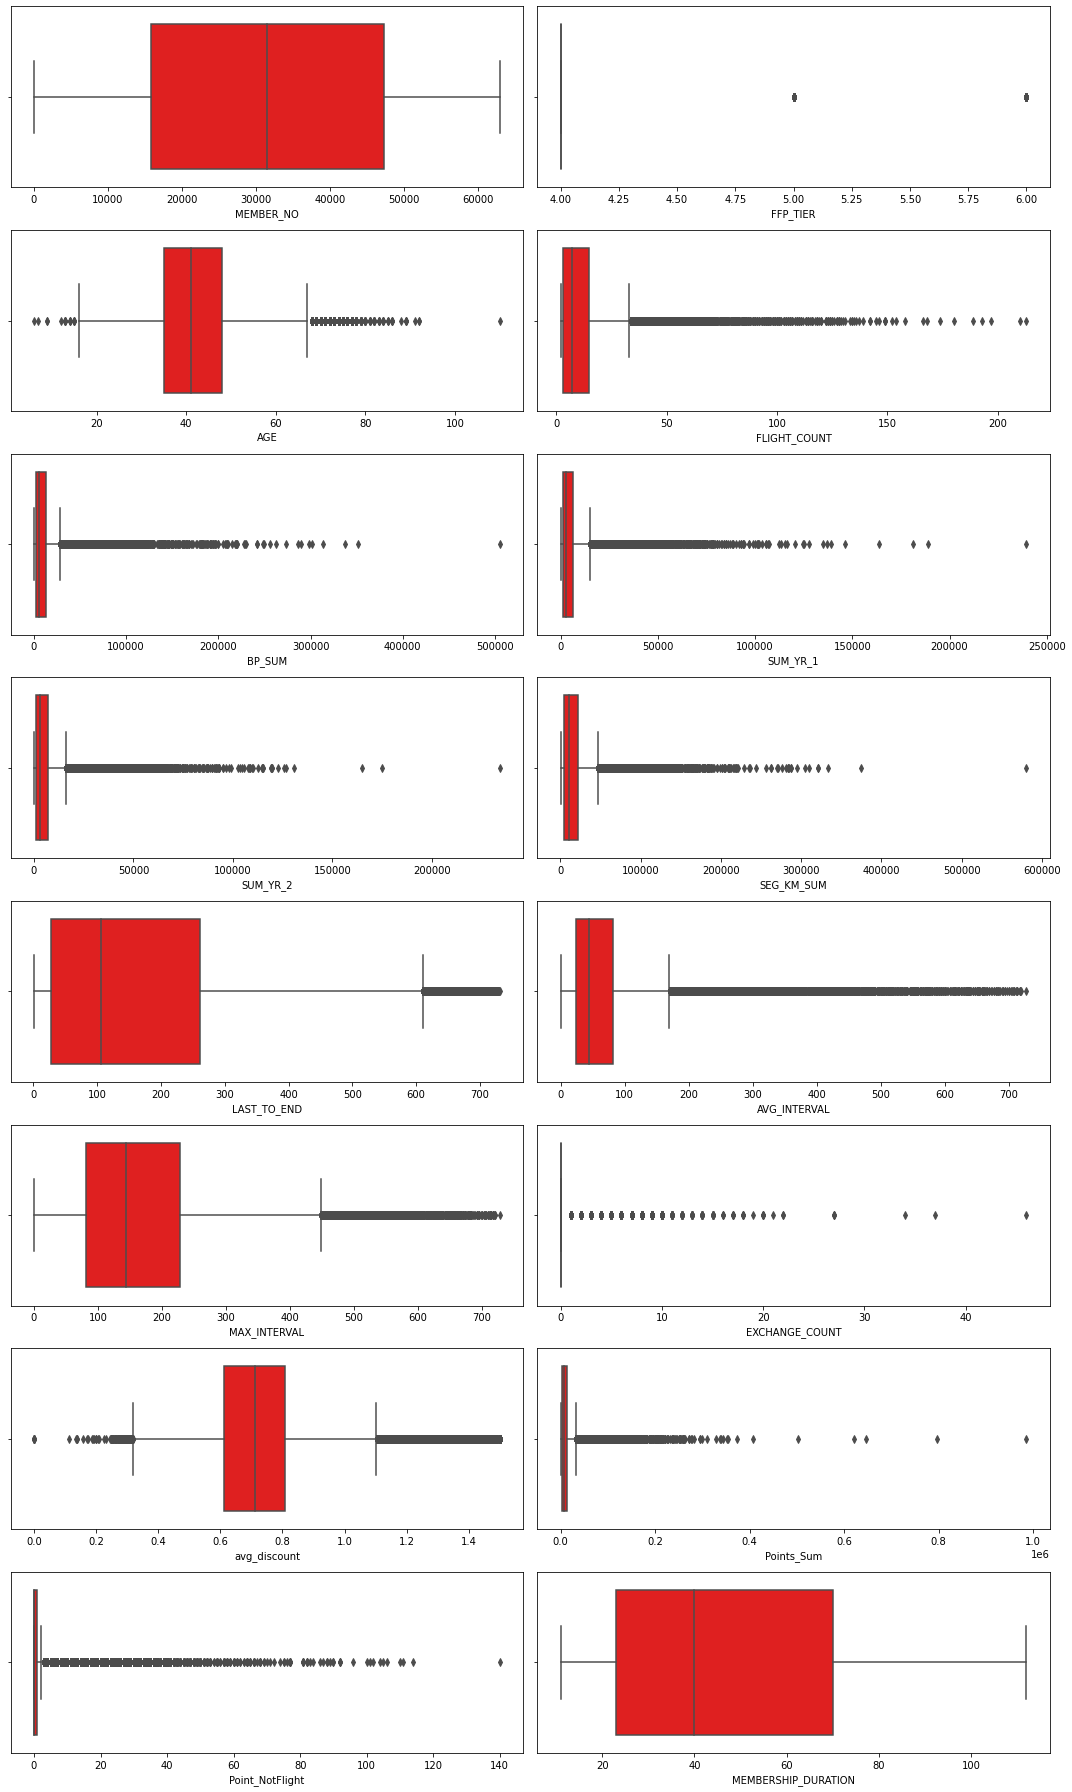

In [ ]:
plt.figure(figsize=(15, 25))
for i in range(0, len(numeric)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df[numeric[i]], color='red')
    plt.tight_layout()

plt.show()

* Fitur yang tidak memiliki pencilan : `MEMBER_NO`, `FFP_TIER`, `MEMBERSHIP_DURATION`
* Fitur lainnya memiliki pencilan

### Dist Plot

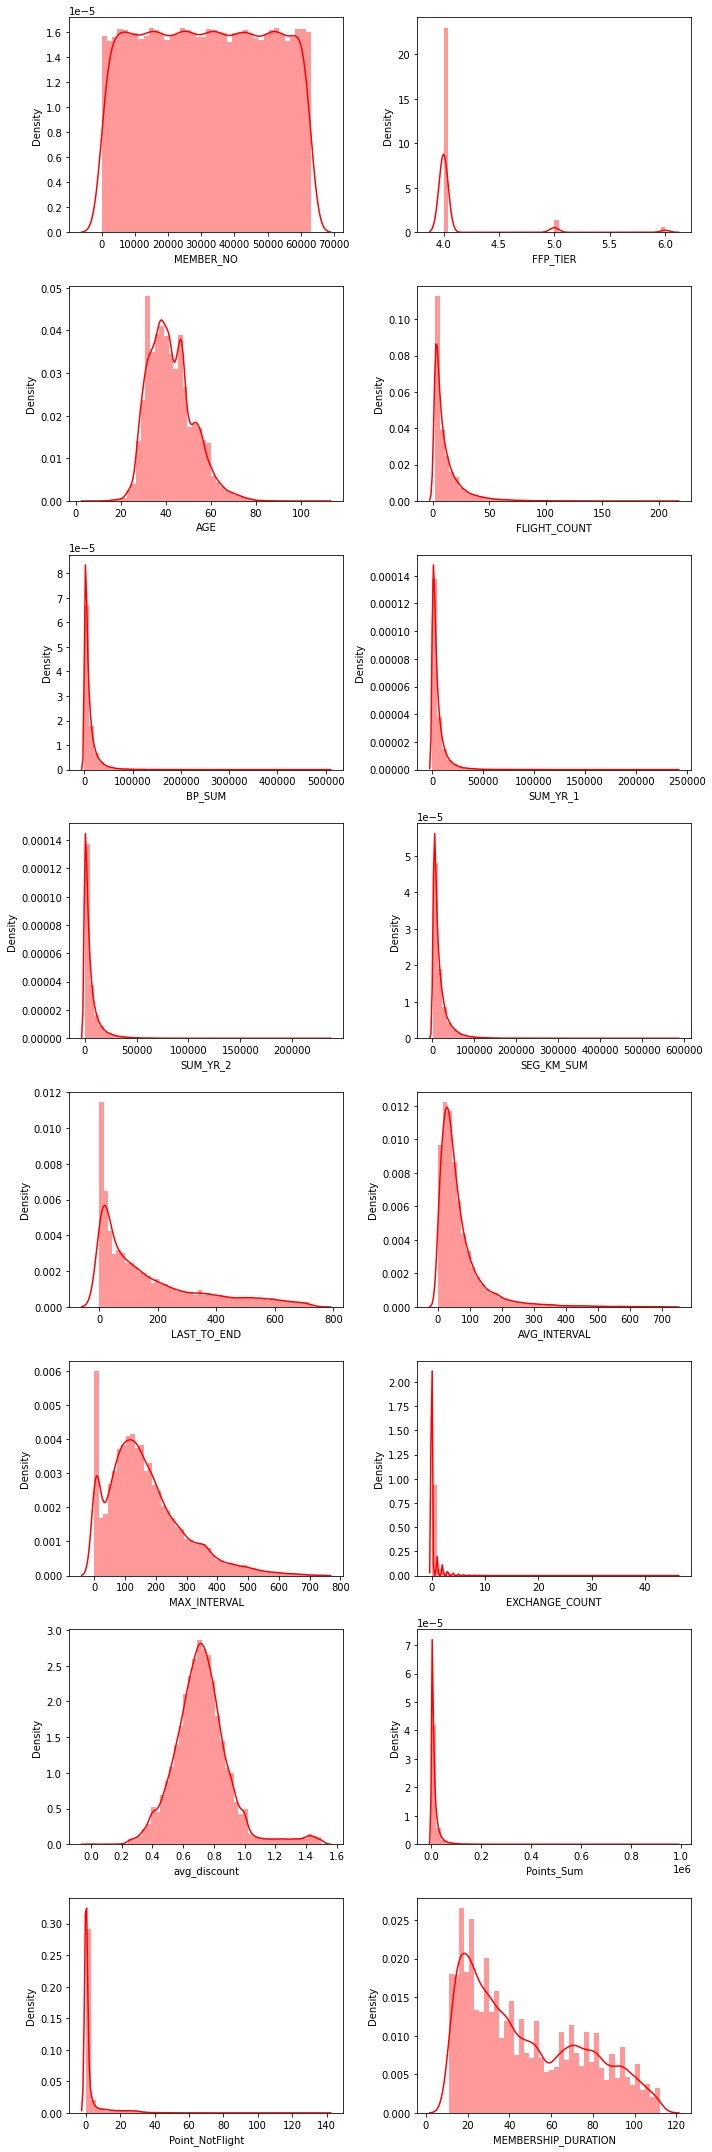

In [ ]:
plt.figure(figsize=(10, 30))
for i in range(0, len(numeric)):
    plt.subplot(8, 2,i+1)
    sns.distplot(df[numeric[i]], color='red')
    plt.tight_layout()

* Fitur `MEMEBER_NO`, `FFP_TIER` : Uniform
* Fitur `AGE`, `avg_discount` : Slightly Normal
* Fitur sisanya : Positive Skewed

### Count Plot

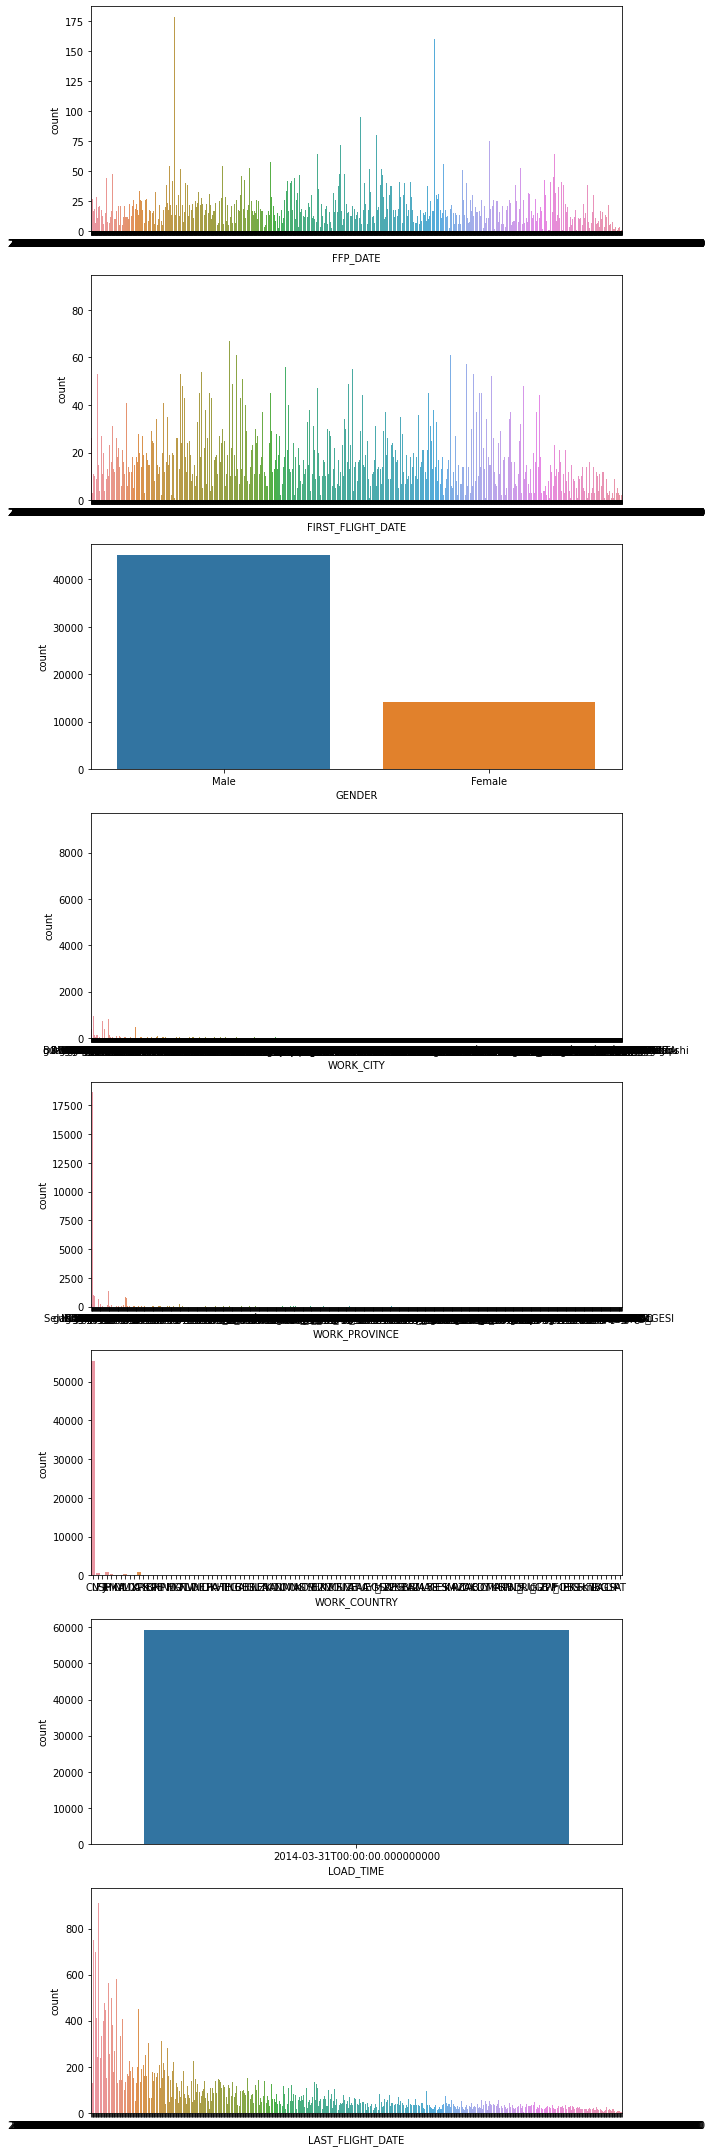

In [ ]:
plt.figure(figsize=(10, 30))
for i in range(0, len(categoric)):
    plt.subplot(8, 1, i+1)
    sns.countplot(df[categoric[i]])
    plt.tight_layout()

* Member paling banyak adalah Pria
* `Load_TIME` hanya memiliki satu value : 2014-03-31
* Fitur sisanya memiliki banyak unique value

## Multivariate

### Correlation Heat Map

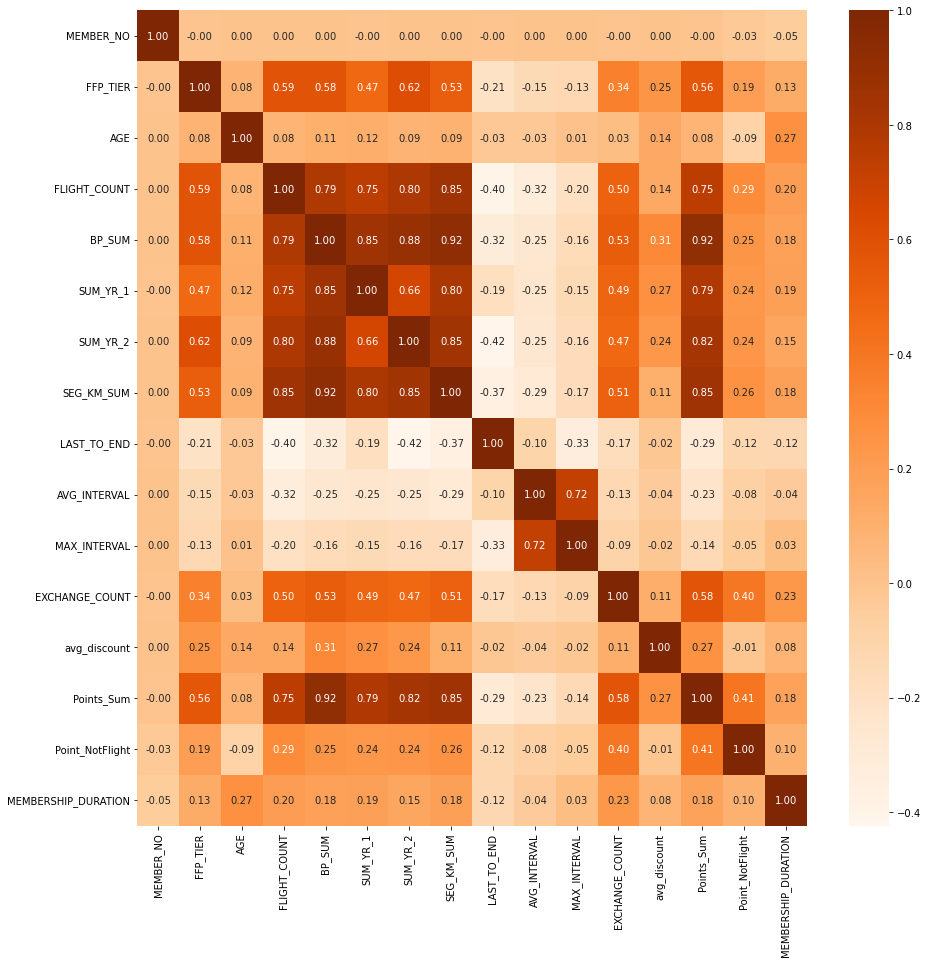

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Oranges', annot=True, fmt='.2f')
plt.show()

* Ada banyak fitur yang berkorelasi satu dan yang lain

### Pair Plot

<Figure size 1080x1080 with 0 Axes>

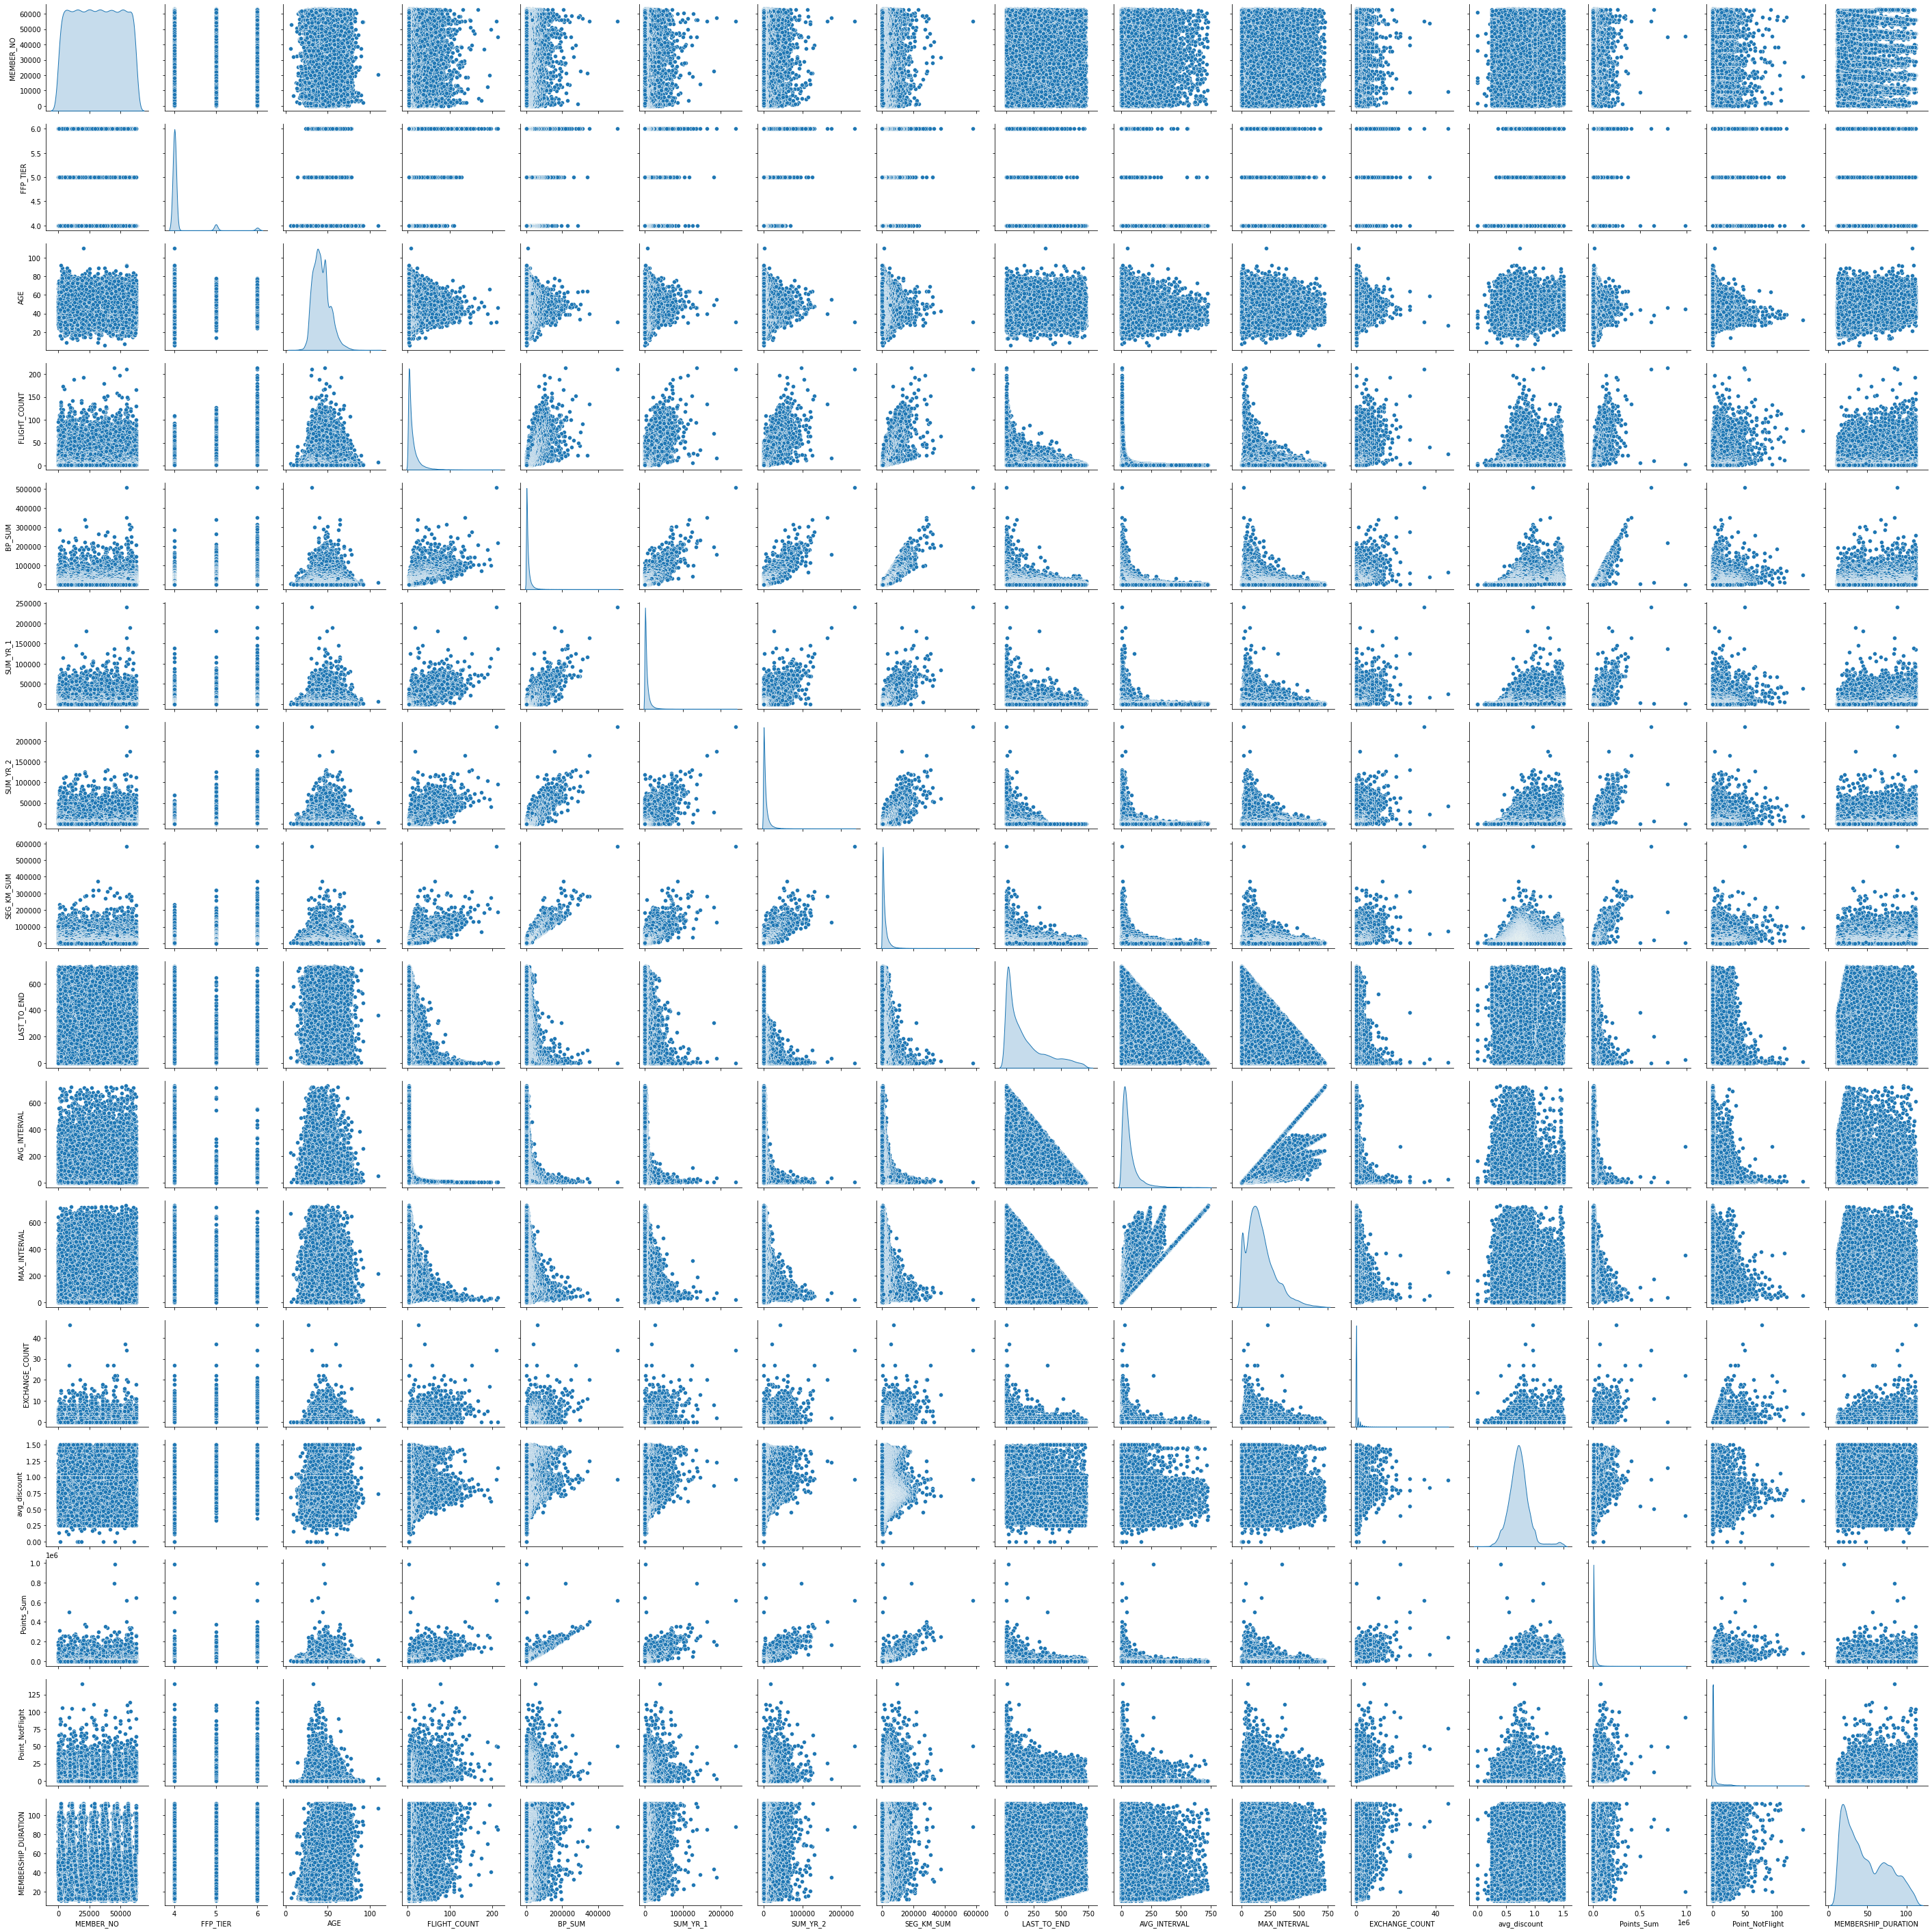

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show()

* Seperti halnya Heat Map, ada banyak fitur yang memiliki hubungan linier satu dengan yang lain

# K-Means Clustering

## Feature Selection

* RFM Metrics
    * Recency : `LAST_TO_END`
    * Frequency : `FLIGHT_COUNT`
    * Monetary : `SEG_KM_SUM`
* Loyalty : `MEMBERSHIP_DURATION`
* Cabin : `avg_discount`

In [2]:
df_select = df[['LAST_TO_END','FLIGHT_COUNT', 'SEG_KM_SUM','MEMBERSHIP_DURATION','avg_discount']]
df_select.sample(5)

NameError: name 'df' is not defined

## Data Scaling

* Scaling dilakukan menggunakan MinMaxScaler, karena banyak fitur yang positive skewed

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for i in df_select:
            df_select[i] = MinMaxScaler().fit_transform(df_select[i].values.reshape(len(df_select), 1))

In [ ]:
df_select.sample(5)

LAST_TO_END  FLIGHT_COUNT  AVG_INTERVAL  SEG_KM_SUM  \
43067     0.591781      0.028436      0.051217    0.009555   
57611     0.282192      0.000000      0.695055    0.005006   
38373     0.036986      0.018957      0.094505    0.017314   
31835     0.016438      0.033175      0.122768    0.015587   
26118     0.158904      0.009479      0.039377    0.018591   

       MEMBERSHIP_DURATION  avg_discount  
43067             0.732673      0.449383  
57611             0.118812      0.331266  
38373             0.445545      0.321413  
31835             0.247525      0.486504  
26118             0.514851      0.539284

## K Identification

### Inertia

In [1]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_select)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

NameError: name 'df_select' is not defined

### Silhouette

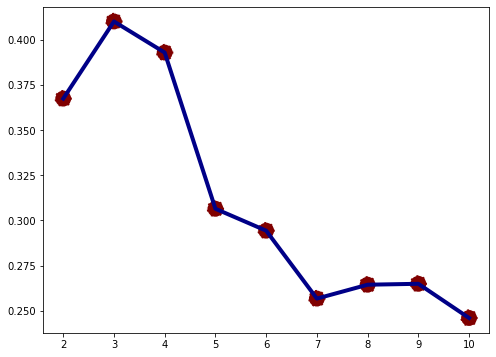

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_select)
    preds = kmeans.predict(df_select)
     
    score_euclidean = silhouette_score(df_select, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)



fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

## Clustering

In [ ]:
df_clean = df.copy()

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_select)
clusters = kmeans.labels_
df_clean['clusters'] = clusters
df_clean.head(5)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993 2006-11-02        2008-12-24   Male         6            .   
2      55106 2007-02-01        2007-08-30   Male         6            .   
3      21189 2008-08-22        2008-08-23   Male         5  Los Angeles   
4      39546 2009-04-10        2009-04-15   Male         6      guiyang   
5      56972 2008-02-10        2009-09-29   Male         6    guangzhou   

  WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  LAST_FLIGHT_DATE  \
0       beijing           CN   31 2014-03-31  ...        2014-03-31   
2       beijing           CN   40 2014-03-31  ...        2014-03-21   
3            CA           US   64 2014-03-31  ...        2013-12-26   
4       guizhou           CN   48 2014-03-31  ...        2014-03-27   
5     guangdong           CN   64 2014-03-31  ...        2014-01-13   

   LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT avg_discount  \
0            1      3.483254            18              34     0.961639   
2           11      5.298507            18              20     1.254676   
3           97     27.863636            73              11     1.090870   
4            5      4.788079            47              27     0.970658   
5           79      7.043956            52              10     0.967692   

   Points_Sum  Point_NotFlight  MEMBERSHIP_DURATION  clusters  
0      619760               50                   88         0  
2      406361               26                   85         0  
3      372204               12                   67         0  
4      338813               39                   59         0  
5      343121               15                   73         0  

[5 rows x 25 columns]

# Cluster Analysis

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(df_select)
pcs = pca.transform(df_select)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = clusters

df_pca.sample(5)

PC 1      PC 2  clusters
16698 -0.216861 -0.264059         1
35735 -0.170634 -0.228822         1
725    0.581881  0.106074         0
7963  -0.358016  0.170956         2
45157 -0.013546 -0.256926         1

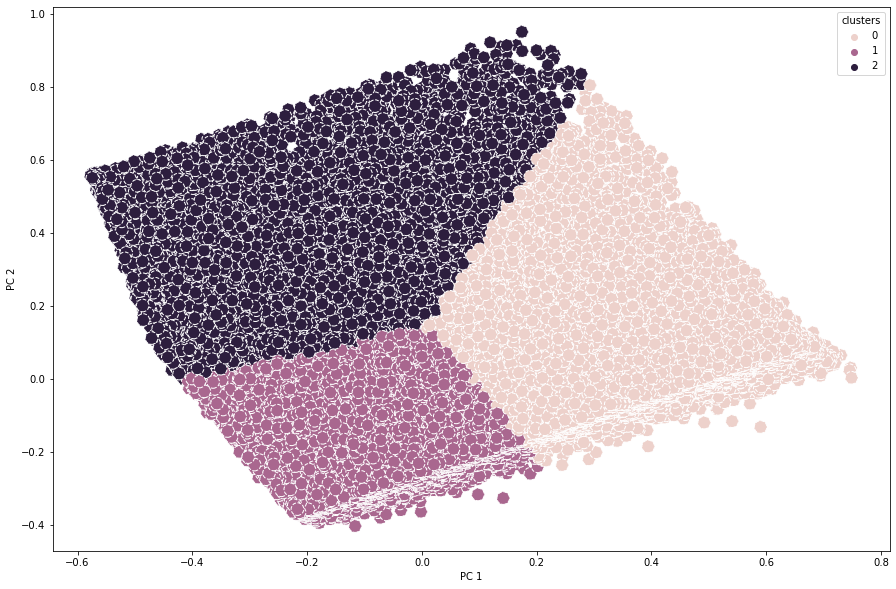

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax)

plt.show()

In [ ]:
df_clean[['LAST_TO_END','FLIGHT_COUNT', 'SEG_KM_SUM',
          'MEMBERSHIP_DURATION','avg_discount','clusters']].groupby('clusters').median()

LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  MEMBERSHIP_DURATION  \
clusters                                                               
0                66.0          10.0     14642.5                 80.0   
1                71.0           8.0     11744.5                 28.0   
2               467.0           3.0      4575.0                 31.0   

          avg_discount  
clusters                
0             0.721434  
1             0.705037  
2             0.714341

In [ ]:
df_clean[['LAST_TO_END','FLIGHT_COUNT', 'SEG_KM_SUM',
          'MEMBERSHIP_DURATION','avg_discount','clusters']].groupby('clusters').mean()

LAST_TO_END  FLIGHT_COUNT    SEG_KM_SUM  MEMBERSHIP_DURATION  \
clusters                                                                 
0           99.925228     16.303431  23235.932747            80.868036   
1           93.165997     12.431853  17937.657364            29.650669   
2          475.656138      4.173053   6557.576926            37.662954   

          avg_discount  
clusters                
0             0.740610  
1             0.710935  
2             0.715659

In [ ]:
df_clean['clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "clusters": "total_members"})

clusters  total_members
0         2          28470
1         1          18895
2         0          11930

* Cluster 0 (high value customer):
    - Recency : low
    - Frequency : high
    - Monetary (Mileage) : high
    - Old Member
    - Least total member
 
* Cluster 1 (mid value customer):
    - Recency : mid
    - Frequency : mid
    - Monetary (Mileage) : mid
    - Newest Member
    - Total member between Cluster 0 & 2
    
* Cluster 2 (low value customers):
    - Recency : high
    - Frequency : low
    - Monetary (Mileage) : low
    - Membership between Cluster 0 & 1
    - Highest number of total member